# Loading data to visualize and compare sequence motifs between Baseline and Acute subjects

In [1]:
# load RSQLite to read the Transformed data
library(RSQLite)
library(data.table)
library(sqldf)

Loading required package: gsubfn

Loading required package: proto



## Loading tables of junction_aa sequence data grouped by disease_stage

In [2]:
# connection to the SQLite database with queried tables
seq_db_path = 'disease_stage.db'
conn <- dbConnect(RSQLite::SQLite(), seq_db_path)

In [3]:
# get extracted tables by disease_stage
query_baseline = 'SELECT * FROM Baseline'
query_acute = 'SELECT * FROM Acute'

In [4]:
# reloading datatables from the SQLite database

getdfRows <- function(conn, query_rows){
    
    conn <- dbConnect( # connection to SQLite database queried tables (Baseline and Acute)
        RSQLite::SQLite(), seq_db_path) 
    df = dbGetQuery(conn,query_rows) # saving the queried tables as dataframes 
    return(df)
}

Generate dataframe instance

In [5]:
df1 = getdfRows(conn, query_baseline) # creating instance of Baseline table
df2 = getdfRows(conn, query_acute) # creating instance of Acute table

In [6]:
# delete the tables from the temporary connected SQLite database
dbRemoveTable(conn, "Baseline", fail_if_missing = FALSE)
dbRemoveTable(conn, "Acute", fail_if_missing = FALSE)

Clean data

In [7]:
clean_df <- function(df){
    # Input : dataframe with specific disease_stage
    setDT(df)  
    cleaned_df <- df[
        junction_aa!="", ][ # remove blank sequences
        !grepl(pattern = "\\*",junction_aa) ] # remove sequences with asterisks

    return(cleaned_df)
             }

In [8]:
df1_cleaned = clean_df(df1) # creating instance of Baseline table
df2_cleaned = clean_df(df2) # creating instance of Acute table

Select data

Select junction_aa of specific length

In [9]:
# get junction_aa column from selected dataframe
select_junction_aa <- function(selected_df){
           
        #    input : "junction_aa" cleaned dataframe
        #    ouput : junction_aa
    seq <- selected_df$junction_aa  
    }

In [10]:
junction_aa_1 <- select_junction_aa(df1_cleaned)
junction_aa_2 <- select_junction_aa(df2_cleaned)

Select subset of junction_aa with specific length

In [11]:
# subset junction_aa column of specific length
select_len <- function(junction_aa, len){
           
        #    input : "junction_aa" cleaned sequence, len length
        #    ouput : junction_aa with specific length
    seq <- junction_aa[nchar(junction_aa) == len] 
    return(seq)
    }

### plot distribution of junction_aa length


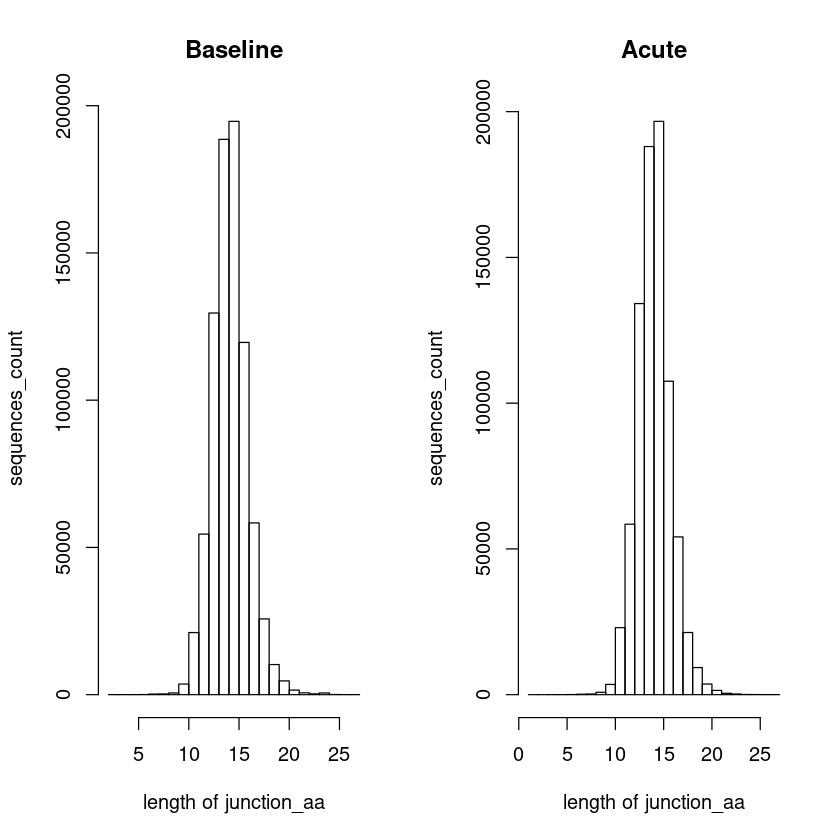

In [33]:
par(mfrow = c(1,2))
hist(nchar(junction_aa_1)
,   main = "Baseline",
,   xlab = "length of junction_aa",
,   ylab = "sequences_count")
hist(nchar(junction_aa_2)
,   main = "Acute",
,   xlab = "length of junction_aa",
,   ylab = "sequences_count")



### pick sequences with length 15

In [22]:
baseline_seq <- select_len(junction_aa_1, 15)
acute_seq <- select_len(junction_aa_2, 15)

# Data Analysis

In [13]:
library(universalmotif)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



Visualize junction_aa as sequence motif

In [14]:
visualize_motif <- function(seq_len ){
    # input sequence of a specific length
    # ouput motif image
    view_motifs(
        convert_type(
            create_motif(
                seq_len, alphabet = "AA"),
         , type = "PCM"))
    }

VISUALIZE 

**BASELINE** MOTIFS

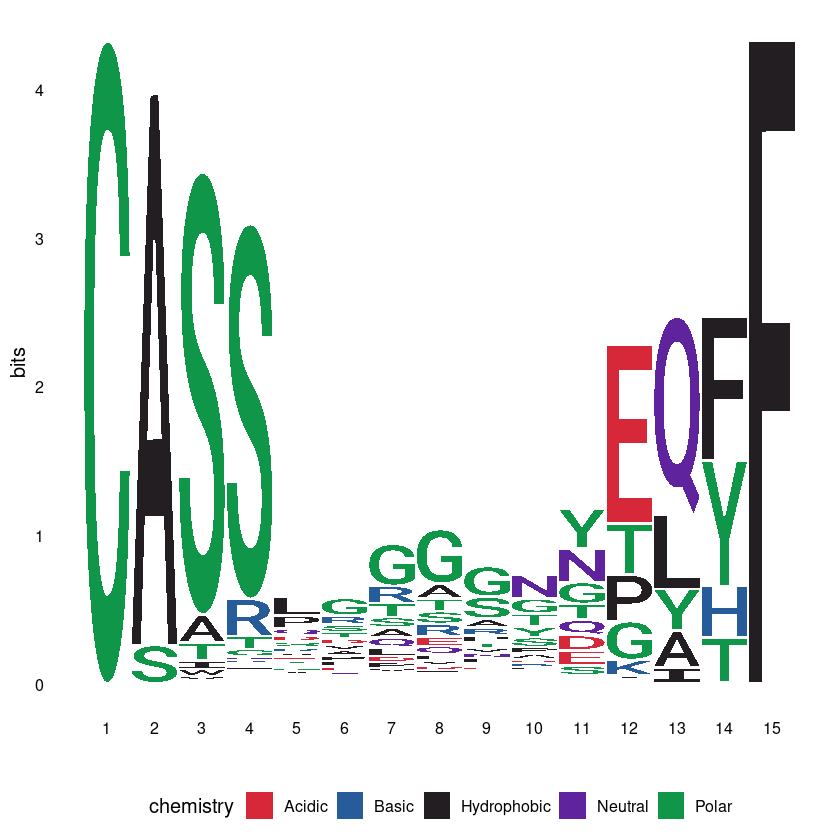

In [15]:
visualize_motif(baseline_seq)

VISUALIZE 

**Acute** MOTIFS

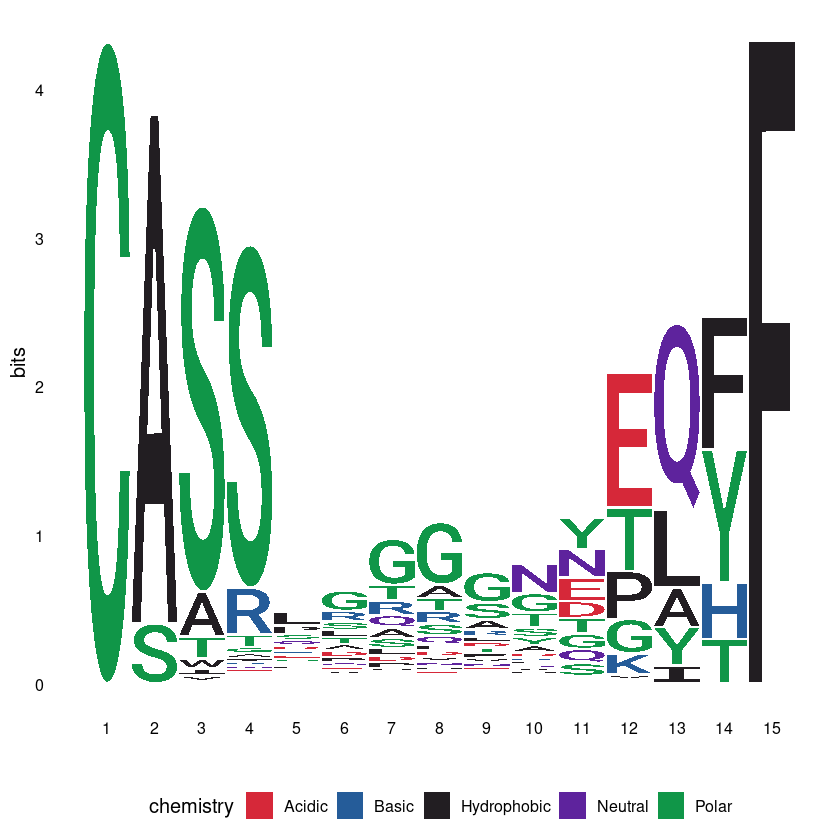

In [16]:
visualize_motif(acute_seq)

# Summary 
Position 1-4 ; conserved
Position 5: conserved
Position 11-13 variable

In [17]:
#Iwish#library(motifStack)